In [1]:
!pip install -U scikit-learn

# INSTALLING IMPORTANT LIBRARIES FOR MODELLING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
import math
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
!pip install pickle-mixin

^C


In [1]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [2]:
import pickle

In [3]:
tscv = TimeSeriesSplit()

In [6]:
pwd

'C:\\Users\\sowmy\\Desktop'

## READING THE DATA

In [7]:
df = pd.read_csv("Twitter_stock_final_dataset (1).csv")
df

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low,Day_of_week
0,2020,1,1,apple,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300,Wednesday
2,2020,1,1,tesla,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420,Wednesday
3,2020,1,1,nvidia,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800,Wednesday
4,2020,1,1,paypal,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2021,9,20,tesla,61,21,39,121,730.1700,24757650.0,734.5577,742.0000,718.6249,Monday
2979,2021,9,20,nvidia,3,4,3,10,211.1300,34944050.0,211.4600,214.3300,206.6200,Monday
2980,2021,9,20,paypal,1,1,2,4,269.9100,7728307.0,271.5500,273.0000,265.6800,Monday
2981,2021,9,21,nvidia,4,4,1,9,212.4600,20468810.0,214.1650,214.2500,209.5000,Tuesday


In [8]:
df = df.dropna()
df

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low,Day_of_week
0,2020,1,1,apple,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300,Wednesday
2,2020,1,1,tesla,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420,Wednesday
3,2020,1,1,nvidia,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800,Wednesday
4,2020,1,1,paypal,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2021,9,20,tesla,61,21,39,121,730.1700,24757650.0,734.5577,742.0000,718.6249,Monday
2979,2021,9,20,nvidia,3,4,3,10,211.1300,34944050.0,211.4600,214.3300,206.6200,Monday
2980,2021,9,20,paypal,1,1,2,4,269.9100,7728307.0,271.5500,273.0000,265.6800,Monday
2981,2021,9,21,nvidia,4,4,1,9,212.4600,20468810.0,214.1650,214.2500,209.5000,Tuesday


In [9]:
df = df.drop(['Day_of_week'],axis=1)

## LABEL ENCODING 

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [11]:
le.fit(df.StockName)

LabelEncoder()

In [12]:
print(le.classes_)

['apple' 'microsoft' 'nvidia' 'paypal' 'tesla']


In [13]:
le.transform(df.StockName)

array([0, 1, 4, ..., 3, 2, 3])

In [14]:
list(le.inverse_transform([0,1,2,3,4]))

['apple', 'microsoft', 'nvidia', 'paypal', 'tesla']

In [15]:
df.StockName = le.transform(df.StockName)

# DATA VISUALIZATION

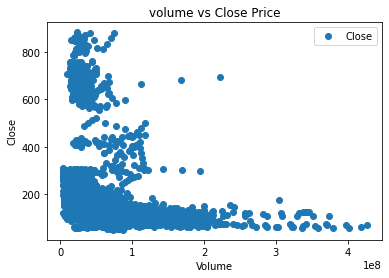

In [15]:
df.plot(x='Volume', y='Close', style='o')  
plt.title('volume vs Close Price')  
plt.xlabel('Volume')  
plt.ylabel('Close')  
plt.show()

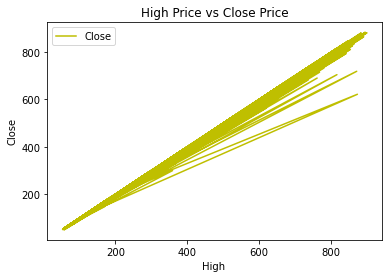

In [18]:
df.plot(x='High', y='Close', style='y')  
plt.title('High Price vs Close Price')  
plt.xlabel('High ')  
plt.ylabel('Close')  
plt.show()

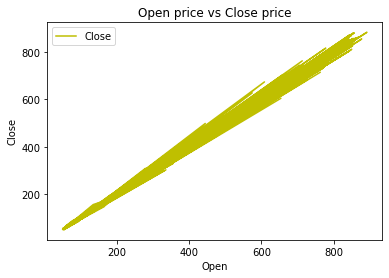

In [19]:
df.plot(x='Open',y='Close' , style='y')
plt.title('Open price vs Close price')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

# NORMALIZE DATA

In [16]:
df2 = df.copy()

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
df3 = pd.DataFrame(scaler.fit_transform(df2))
df3.columns = df2.columns
df3.index = df2.index
df3


,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low
0,0.0,0.000000,0.000000,0.00,0.025641,0.012346,0.007266,0.016034,0.031160,0.312846,0.028568,0.026730,0.034640
1,0.0,0.000000,0.000000,0.25,0.023077,0.000000,0.009991,0.016034,0.133719,0.046200,0.129263,0.127660,0.136926
2,0.0,0.000000,0.000000,1.00,0.043590,0.018519,0.002725,0.018565,0.044307,0.105557,0.041452,0.039690,0.047399
3,0.0,0.000000,0.000000,0.50,0.002564,0.000000,0.000000,0.000000,0.013043,0.048874,0.011486,0.008836,0.016952
4,0.0,0.000000,0.000000,0.75,0.002564,0.000000,0.000908,0.000844,0.073922,0.010300,0.070655,0.069258,0.077568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,1.0,0.727273,0.633333,1.00,0.156410,0.129630,0.035422,0.101266,0.816640,0.051209,0.813608,0.813189,0.814896
2979,1.0,0.727273,0.633333,0.50,0.007692,0.024691,0.002725,0.007595,0.194283,0.075243,0.191876,0.190874,0.195358
2980,1.0,0.727273,0.633333,0.75,0.002564,0.006173,0.001817,0.002532,0.264763,0.011029,0.263297,0.260067,0.266822
2981,1.0,0.727273,0.666667,0.50,0.010256,0.024691,0.000908,0.006751,0.195878,0.041090,0.195091,0.190780,0.198843


In [23]:
df4 = df.copy()
column = ['Volume','Open','High','Low','Positive','Negative','Neutral']
df4[column] = df4[column] /df4[column].abs().max()
df4

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low
0,2020,1,1,0,0.025641,0.012346,0.007266,20,75.0875,0.317761,0.083085,0.083463,0.084669
1,2020,1,1,1,0.023077,0.000000,0.009991,20,160.6200,0.053023,0.178128,0.178510,0.181654
2,2020,1,1,4,0.043590,0.018519,0.002725,23,86.0520,0.111955,0.095246,0.095668,0.096767
3,2020,1,1,2,0.002564,0.000000,0.000000,1,59.9775,0.055677,0.066961,0.066612,0.067898
4,2020,1,1,3,0.002564,0.000000,0.000908,2,110.7500,0.017380,0.122810,0.123512,0.125373
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2021,9,20,4,0.156410,0.129630,0.035422,121,730.1700,0.057996,0.824068,0.824078,0.824489
2979,2021,9,20,2,0.007692,0.024691,0.002725,10,211.1300,0.081858,0.237228,0.238039,0.237058
2980,2021,9,20,3,0.002564,0.006173,0.001817,4,269.9100,0.018104,0.304640,0.303199,0.304819
2981,2021,9,21,2,0.010256,0.024691,0.000908,9,212.4600,0.047949,0.240262,0.237950,0.240363


In [16]:
df5 = df.copy()
df5

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low
0,2020,1,1,0,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975
1,2020,1,1,1,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300
2,2020,1,1,4,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420
3,2020,1,1,2,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800
4,2020,1,1,3,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2021,9,20,4,61,21,39,121,730.1700,24757650.0,734.5577,742.0000,718.6249
2979,2021,9,20,2,3,4,3,10,211.1300,34944050.0,211.4600,214.3300,206.6200
2980,2021,9,20,3,1,1,2,4,269.9100,7728307.0,271.5500,273.0000,265.6800
2981,2021,9,21,2,4,4,1,9,212.4600,20468810.0,214.1650,214.2500,209.5000


In [25]:
import seaborn as sns


# LINEAR REGRESSION MODEL

In [16]:
#samples = []
#rmse = []
#mae = []

x = df5[['Year','Month','Day','StockName','Positive','Negative','Neutral','Volume','Open','Low','High']].to_numpy()
y = np.array(df5['Close'])

for train_index, test_index in tscv.split(x):
    x_train , x_test = x[train_index] , x[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    regresor = LinearRegression()
    regresor.fit(x_train,y_train)
    y_pred = regresor.predict(x_test)
    rmse = (math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    mae = (metrics.mean_absolute_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    #accuracy = metrics.accuracy_score(y_test, y_pred,normalize=False)
    

#for i in range(len(samples)):
print(  "RMSE :" ,rmse , "mae :" , mae,"r^2 :",r2 )
#print(accuracy)

    

RMSE : 3.130532508336315 mae : 1.9251176526610219 r^2 : 0.999735839664859


In [19]:
regresor.predict([[2020,1,1,0,10,2,8,135647440.0,74.0600,75.1500,75.1500]])

array([75.39107719])

In [26]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [27]:
prediction = model.predict(x_test)

In [47]:
with open('new_model_pickle','wb') as f:
    pickle.dump(model,f)

In [48]:
with open('new_model_pickle','rb') as f:
    mp = pickle.load(f)

In [39]:
import numpy

In [49]:
mp.predict([[2020,1,1,0,10,2,8,135647440.0,74.0600,75.1500,73.7975]])

array([74.91767937])

In [50]:
mp.predict([[2021,9,20,4,61,21,39,24757650.0,734.5577,742.0000,718.6249]])

array([743.47851619])

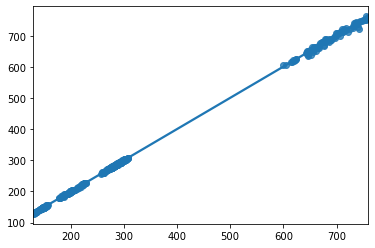

In [27]:
rp = sns.regplot(x=y_test, y=y_pred)

In [17]:
d = pd.DataFrame({'Actual_Close_Price': y_test, 'Predicted_Close_Price': y_pred})
d.head(5)

,Actual_Close_Price,Predicted_Close_Price
0,178.897500,178.012663
1,273.190000,273.326551
2,129.436667,127.702669
3,259.223333,258.832769
4,615.090000,618.376570


In [29]:
d.Actual_Close_Price

0      178.897500
1      273.190000
2      129.436667
3      259.223333
4      615.090000
          ...    
492    730.170000
493    211.130000
494    269.910000
495    212.460000
496    269.490000
Name: Actual_Close_Price, Length: 497, dtype: float64

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean
from sklearn import linear_model

In [19]:
plot_df = d[:200]
plot_df

,Actual_Close_Price,Predicted_Close_Price
0,178.897500,178.012663
1,273.190000,273.326551
2,129.436667,127.702669
3,259.223333,258.832769
4,615.090000,618.376570
...,...,...
195,649.260000,656.127123
196,195.940000,195.786623
197,303.690000,305.876446
198,148.560000,148.177636


In [20]:
plot_df.to_csv('act_vs_pred.csv')

In [37]:
# convert height and weight columns to lists
act_list = plot_df['Actual_Close_Price'].tolist()
pre_list = plot_df['Predicted_Close_Price'].tolist()

# convert lists to numpy lists
xs = np.array(act_list, dtype=np.float64)
ys = np.array(pre_list, dtype=np.float64)

In [42]:
# Create linear regression object
act_pred = linear_model.LinearRegression()

# Train the model using the training sets
act_pred.fit(xs.reshape(-1,1),ys)

# get the regression line using the model
regression_line = act_pred.predict(xs.reshape(-1,1))

# Making predictions
KSI_act = 289.670000
KSI_pred = act_pred.predict(np.array([[KSI_act]]))[0]
KSI_pred

290.0913531254602

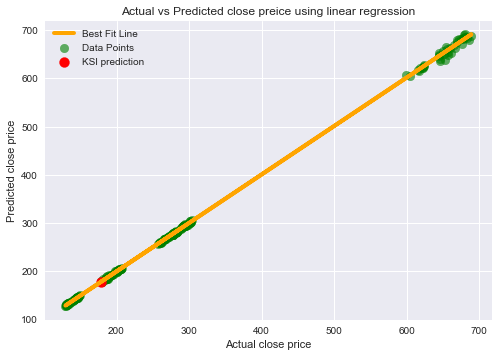

<Figure size 576x396 with 0 Axes>

In [46]:
# Plot outputs and plot customization
style.use('seaborn')
plt.scatter(xs,ys,label='Data Points', alpha=0.6,color='green',s=75)
plt.scatter(KSI_height,KSI_weight, label='KSI prediction',color='red',s=100)
plt.plot(xs,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('Actual vs Predicted close preice using linear regression')
plt.xlabel('Actual close price')
plt.ylabel('Predicted close price')
plt.legend()
plt.show()
plt.savefig('LRplot.jpg')

<Figure size 576x396 with 0 Axes>

# RANDOMFOREST REGRESSOR MODEL

In [30]:
#samples = []
#rmse = []
#mae = []

x = df5[['Year','Month','Day','StockName','Positive','Negative','Neutral','Volume','Open','Low','High']].to_numpy()
y = np.array(df5['Close'])

for train_index, test_index in tscv.split(x):
    x_train , x_test = x[train_index] , x[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    regresor =RandomForestRegressor(n_estimators = 10, random_state = 0)
    regresor.fit(x_train,y_train)
    y_pred = regresor.predict(x_test)
    rmse = (math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    mae = (metrics.mean_absolute_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    #accuracy = metrics.accuracy_score(y_test, y_pred,normalize=False)
    

#for i in range(len(samples)):
print(  "RMSE :" ,rmse , "mae :" , mae,"r^2 :",r2 )
#print(accuracy)

RMSE : 4.2451615253024375 mae : 2.6752984238631816 r^2 : 0.9995142423935549


In [49]:
with open('stock_model_RandonForest.pkl', 'wb') as file:
 pickle.dump(regresor, file)


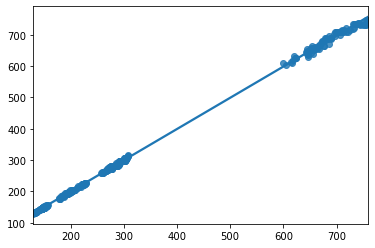

In [31]:
rp = sns.regplot(x=y_test, y=y_pred)

In [32]:
d = pd.DataFrame({'Actual_Close_Price': y_test, 'Predicted_Close_Price': y_pred})
d.head(5)

,Actual_Close_Price,Predicted_Close_Price
0,178.897500,176.714583
1,273.190000,270.817000
2,129.436667,127.933667
3,259.223333,258.294667
4,615.090000,614.130000


# XG BOOSTING USING HYPERTUNING

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
xgb = XGBRegressor()

params = {'learning_rate':[0.01,0.03,0.05,0.1],
          'n_estimators':[5,10,15,20,50,70,100],
          'max_depth':[3,5,10]} 

cross_val = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10,cv=5,n_jobs=-1, verbose=10)
cross_val.fit(x_train,y_train)

print('='*100)
print('The Best Parameters are : ',cross_val.best_params_)
print('='*100) 

xgb_best = cross_val.best_estimator_ 
xgb_best.fit(x_train, y_train)

y_pred = xgb_best.predict(x_test)

rmse = (math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
mae = (metrics.mean_absolute_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
    #accuracy = metrics.accuracy_score(y_test, y_pred,normalize=False)
    

#for i in range(len(samples)):
print(  "RMSE :" ,rmse , "mae :" , mae,"r^2 :",r2 )
#print(accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The Best Parameters are :  {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05}
RMSE : 5.735650016702198 mae : 3.909623901244381 r^2 : 0.9991132596774276


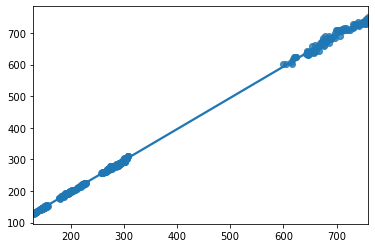

In [34]:
rp = sns.regplot(x=y_test, y=y_pred)

In [35]:
d = pd.DataFrame({'Actual_Close_Price': y_test, 'Predicted_Close_Price': y_pred})
d.head(5)

,Actual_Close_Price,Predicted_Close_Price
0,178.897500,176.105743
1,273.190000,268.473175
2,129.436667,127.530952
3,259.223333,256.245819
4,615.090000,606.941833


# AdaBoost Regressor

In [17]:
#samples = []
#rmse = []
#mae = []

x = df5[['Year','Month','Day','StockName','Positive','Negative','Neutral','Volume','Open','Low','High']].to_numpy()
y = np.array(df5['Close'])

for train_index, test_index in tscv.split(x):
    x_train , x_test = x[train_index] , x[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    regresor =AdaBoostRegressor(random_state=10, n_estimators=80)
    regresor.fit(x_train,y_train)
    y_pred = regresor.predict(x_test)
    rmse = (math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    mae = (metrics.mean_absolute_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    #accuracy = metrics.accuracy_score(y_test, y_pred,normalize=False)
    

#for i in range(len(samples)):
print(  "RMSE :" ,rmse , "mae :" , mae,"r^2 :",r2 )
#print(accuracy)

RMSE : 7.177670952093852 mae : 5.2916241768866525 r^2 : 0.9986113325339405


In [18]:
d = pd.DataFrame({'Actual_Close_Price': y_test, 'Predicted_Close_Price': y_pred})
d.head(5)

,Actual_Close_Price,Predicted_Close_Price
0,178.897500,185.620706
1,273.190000,272.056882
2,129.436667,110.721015
3,259.223333,268.181382
4,615.090000,600.942583


# RESULTS

In [19]:
res = [['Linear Regression', 0.9997,3.130,1.925], ['Random Forest Regressor',0.9995,4.245,2.675], ['XGBoost Regressor',  0.9991,5.7356,3.9096],['AdaBoost Regressor',0.9986,7.1776, 5.2916]]
 
# Create the pandas DataFrame
res = pd.DataFrame(res, columns = ['Model Name', 'R square value', 'Root Mean Square Error','Mean Avg.Error'])

In [20]:
res

,Model Name,R square value,Root Mean Square Error,Mean Avg.Error
0,Linear Regression,0.9997,3.1300,1.9250
1,Random Forest Regressor,0.9995,4.2450,2.6750
2,XGBoost Regressor,0.9991,5.7356,3.9096
3,AdaBoost Regressor,0.9986,7.1776,5.2916


# CONCLUSION

Best stock price prediction given by Linear Regession model closely followed by Random Forest Regressor.


# SAVING BEST PREDICTION MODEL TO PICKLE FILE

### CHOSEN MODEL - LINEAR REGRESSION

In [21]:
model1 = LinearRegression()
model1.fit(x,y)

LinearRegression()

In [22]:
pred = model1.predict(x_test)
pred

array([177.87220874, 272.91438131, 127.66363038, 258.55574844,
       617.32352985, 178.1703315 , 128.86779996, 258.84339617,
       621.21415008, 178.72575936, 274.12321463, 129.99589755,
       259.05240076, 606.96565925, 179.00372094, 273.4082286 ,
       129.42669567, 256.45745701, 604.84288039, 177.91374913,
       131.35944419, 259.3486296 , 615.50956929, 183.37925784,
       274.81427855, 131.16680507, 261.17585041, 624.34108213,
       190.46762337, 281.49377667, 130.66749273, 260.82149223,
       622.57000468, 187.15465584, 281.13101797, 130.53014562,
       260.69044997, 620.85965343, 184.10643753, 280.61409121,
       130.61056756, 260.91172824, 620.49542518, 181.1203206 ,
       280.21659516, 132.7085176 , 265.09743127, 626.31626784,
       187.57605127, 133.94965553, 266.3204357 , 647.74477426,
       191.11066209, 288.31729089, 133.65141165, 267.61050051,
       686.41891465, 193.18889741, 294.36786637, 133.47984023,
       266.79677639, 680.35168125, 191.00112684, 290.90

In [23]:
x = df5[['Year','Month','Day','StockName','Positive','Negative','Neutral']].to_numpy()
y = np.array(df5['Close'])

In [24]:
import pickle

In [26]:
with open('model_pickle','wb') as f:
    pickle.dump(model1,f)

In [27]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)
    